# Loan Approval Prediction #

# Introduction
This project aims to predict whether a loan application will be approved or not, based on applicant details such as income, loan amount, CIBIL score, and other financial features.  

I compare multiple machine learning models like Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, KNN, and SVM to evaluate their performance on this dataset.


## 🏦 Problem Statement

Banks face challenges in deciding whether to approve or reject loan applications. Wrong decisions can either lead to **financial losses** (if high-risk customers are approved) or **loss of opportunity** (if genuine customers are rejected).  

Our goal is to build a **machine learning model** that can predict whether a loan application should be approved or not, based on applicant details like income, employment status, credit score, and asset values.  

---

## 🎯 Objective

- Analyze the dataset and explore key factors affecting loan approvals.  
- Preprocess the data (handle missing values, encoding, scaling).  
- Apply multiple **classification algorithms** (Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, KNN, SVM).  
- Evaluate model performance using **Accuracy, Precision, Recall, F1 Score, and ROC-AUC**.  
- Identify the most suitable model for predicting loan approvals.  


# Data Description
The dataset contains information about loan applicants and whether their loan was approved (`loan_status`).  

- **Features include**:  
  - Applicant's dependents  
  - Education level  
  - Employment status  
  - Annual income  
  - Loan amount & term  
  - CIBIL score  
  - Asset values  

- **Target variable**: `loan_status` (Approved = 1, Not Approved = 0)

## 📊 Dataset Features

The dataset contains the following features:

- **Applicant's Dependents** 🧑‍👩‍👦  
  Number of dependents (children or family members financially dependent on the applicant).  

- **Education Level** 🎓  
  Applicant’s highest level of education (Graduate/Not Graduate).  

- **Employment Status (Self_Employed)** 💼  
  Whether the applicant is self-employed or salaried.  

- **Annual Income** 💰  
  Applicant’s yearly income in local currency.  

- **Loan Amount** 💳  
  The requested loan amount.  

- **Loan Term** 📅  
  The duration/tenure of the loan in months.  

- **CIBIL Score** 📊  
  Applicant’s credit score (higher score = lower risk).  

- **Residential Assets Value** 🏠  
  Value of residential property/assets owned by the applicant.  

- **Commercial Assets Value** 🏢  
  Value of commercial property/assets owned.  

- **Luxury Assets Value** 🚗💎  
  Value of luxury assets like cars, jewelry, etc.  

- **Bank Asset Value** 🏦  
  Total value of savings and assets in the applicant’s bank account.  

- **Loan Status (Target)** ✅  
  Whether the loan was approved (1) or not approved (0). 

# Import Libraries & Load Data

In [30]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Step 2: Load dataset
# If you uploaded the file in Kaggle, use "../input/filename.csv"
# Otherwise, replace the path with your dataset location
df = pd.read_csv("/kaggle/input/approval-prediction-dataset/loan_approval_dataset.csv")

print("Loan Approval Dataset: ")
df

Loan Approval Dataset: 


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# 🔎 Exploratory Data Analysis (EDA)

We analyzed the dataset to check distribution and relationships between variables. Some important plots include:  

- Distribution of **Loan Status** (countplot + pie chart).  
- Relationship between **Income and Loan Status**.  
- Loan Amount vs Loan Status.  
- CIBIL Score comparison between approved and rejected loans.  
- Outlier detection using boxplots for Income and Loan Amount.  

These visualizations helped us understand which factors strongly affect loan approval.  



## Data Overview 

In [32]:
# Step 3: Basic info about dataset
print("Shape of dataset:", df.shape)

Shape of dataset: (4269, 13)


In [33]:
print("\nFirst 5 rows:\n")
df.head(5)   # table format mai show hoga


First 5 rows:



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [34]:
print("\nDataset Info:\n")
df.info()    # ye text-based hi rahega


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB

In [35]:
print("\nMissing Values:\n")
df.isnull().sum()   # ye bhi neat series format mai aa jayega


Missing Values:



loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

## Loan Status Distribution (Target Variable) 

In [36]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


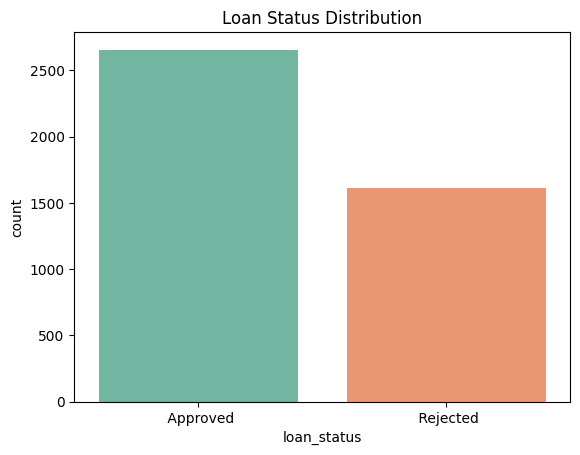

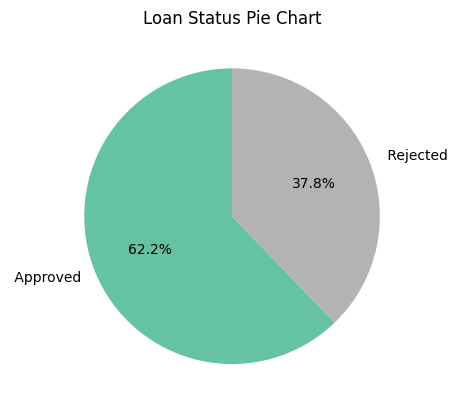

In [37]:
sns.countplot(x="loan_status", data=df, palette="Set2")
plt.title("Loan Status Distribution")
plt.show()

df["loan_status"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap="Set2")
plt.title("Loan Status Pie Chart")
plt.ylabel("")
plt.show()


In [38]:
# Step 4: Quick statistics
print("\nSummary statistics:\n")
df.describe(include="all")


Summary statistics:



/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


## Numerical Features Distribution 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


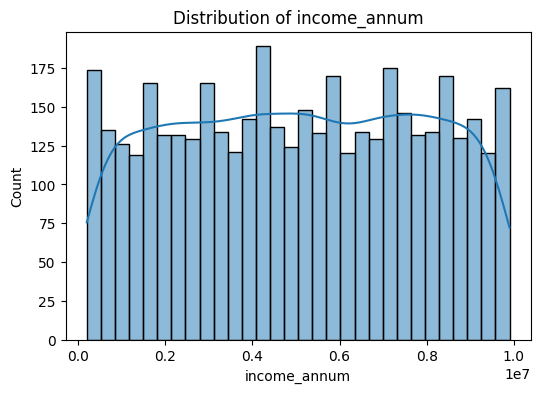

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


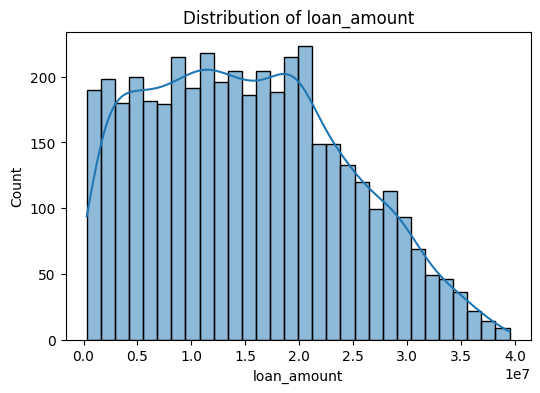

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


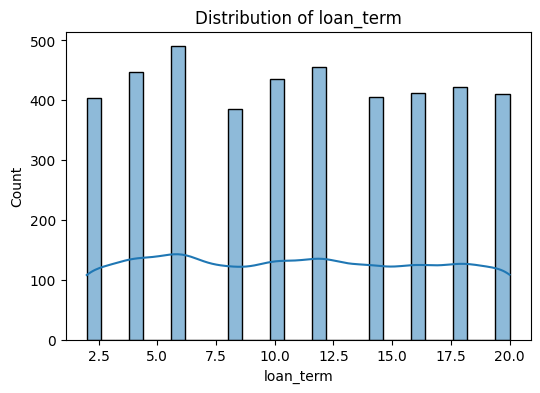

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


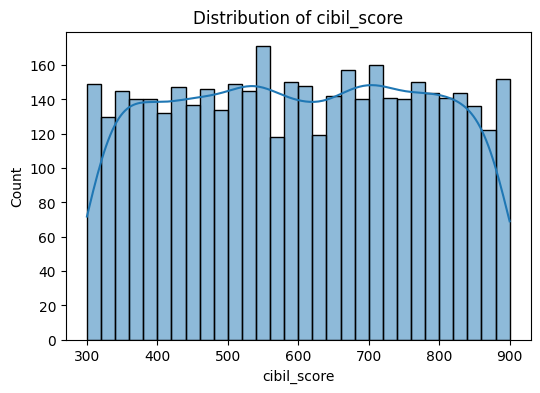

In [39]:
num_cols = ["income_annum", "loan_amount", "loan_term", "cibil_score"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


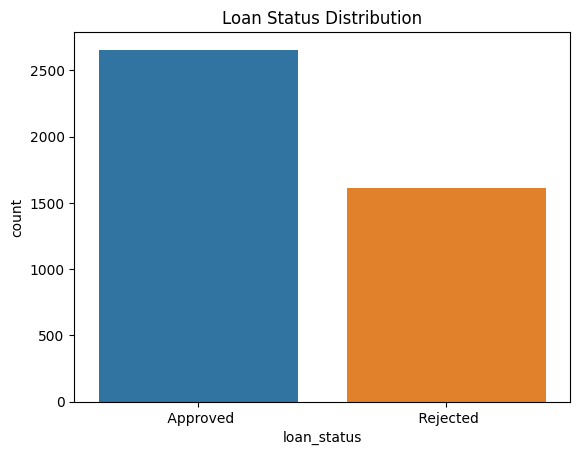

In [40]:
# Step 5: Target variable distribution (example: loan_status)
if "loan_status" in df.columns:
    sns.countplot(x="loan_status", data=df)
    plt.title("Loan Status Distribution")
    plt.show()
else:
    print("⚠️ Target column 'loan_status' not found. Check dataset columns:", df.columns)


In [41]:
# Strip spaces from column names
df.columns = df.columns.str.strip()

# Check cleaned column names
print(df.columns)


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


## Categorical Features vs Loan Status 

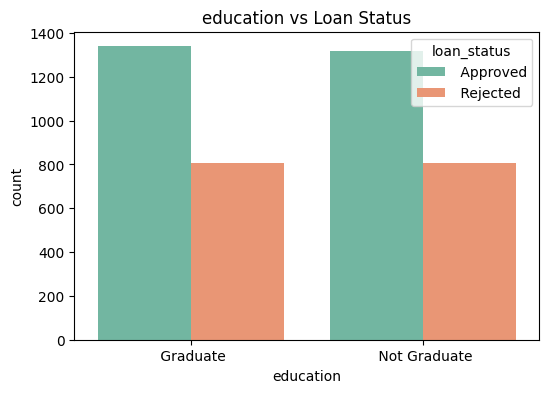

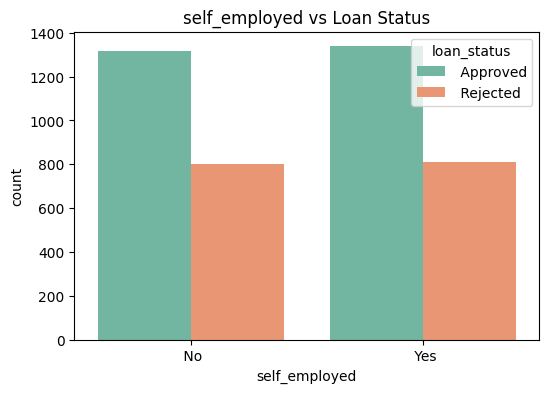

In [42]:
cat_cols = ["education", "self_employed"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="loan_status", data=df, palette="Set2")
    plt.title(f"{col} vs Loan Status")
    plt.show()

## Boxplots for Outliers + Target Relation 

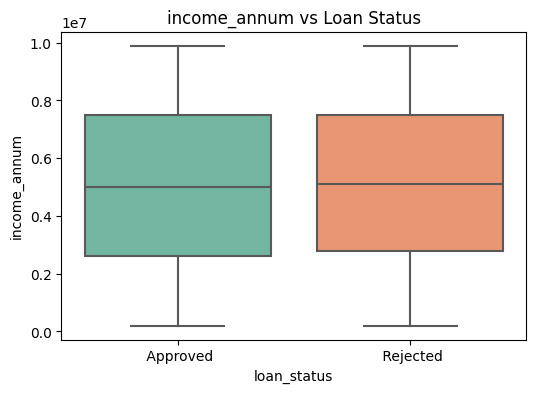

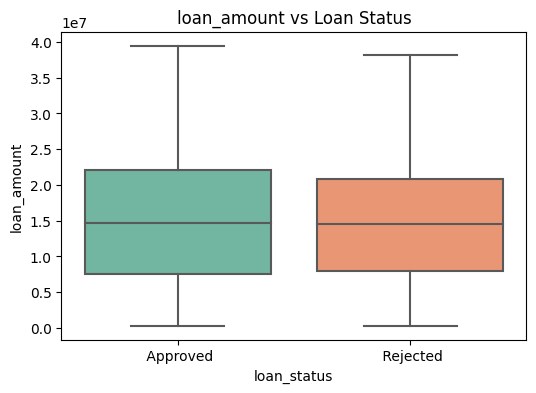

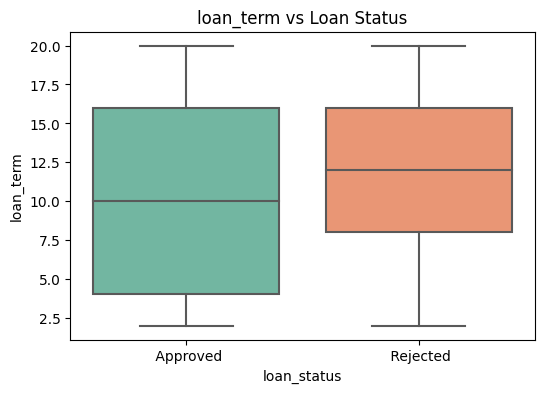

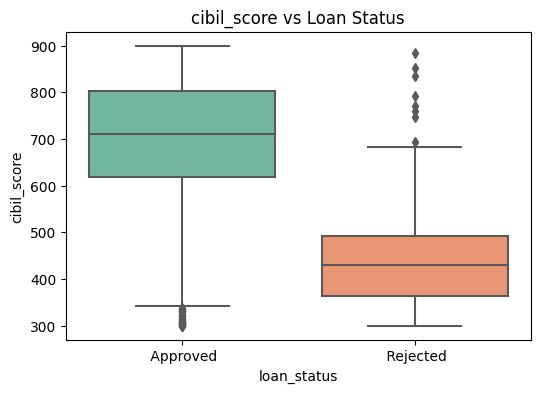

In [43]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="loan_status", y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Loan Status")
    plt.show()

## Correlation Heatmap 

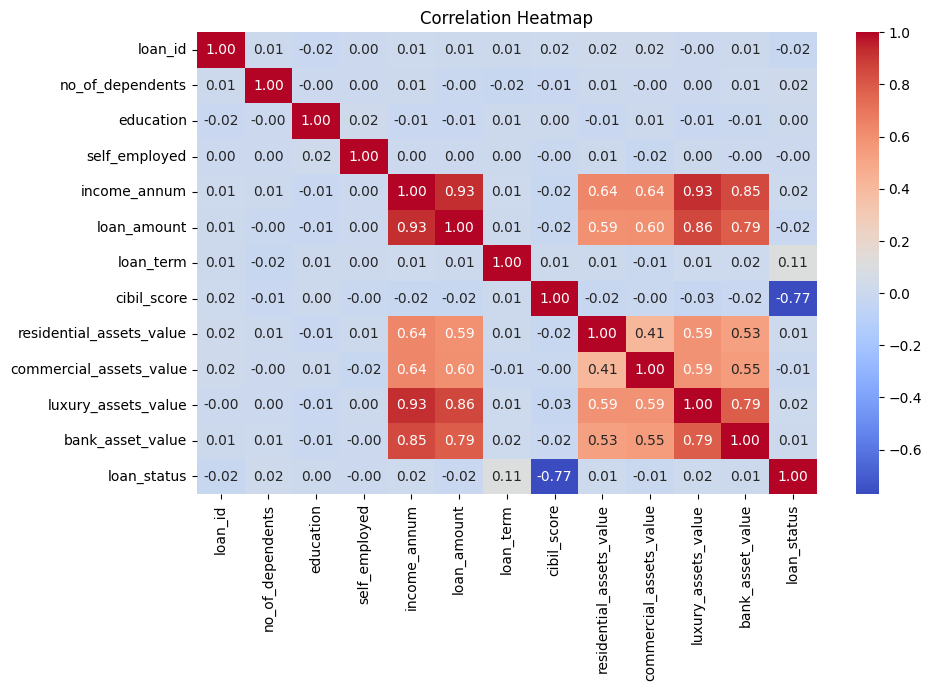

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Data Preprocessing  

Steps taken:  
1. **Handling Missing Values** → Replaced missing categorical values with mode and numerical values with median.  
2. **Encoding Categorical Variables** → Used Label Encoding to convert text features into numeric.  
3. **Feature Scaling** → Applied StandardScaler for KNN and SVM models.  
4. **Train-Test Split** → 80% data for training and 20% for testing.  


## 🛠  Missing Values Handling

Some columns have missing values.  
- For categorical features → replaced with mode (most frequent value).  
- For numerical features → replaced with median.

In [45]:
# Step 6: Handle Missing Values (safe version, no warning)
for column in df.columns:
    if df[column].dtype == "object":  # categorical
        df[column] = df[column].fillna(df[column].mode()[0])
    else:  # numerical
        df[column] = df[column].fillna(df[column].median())

print("✅ Missing values handled.\n")


✅ Missing values handled.



## Encoding & Feature Engineering

Since ML models require numerical inputs, categorical columns are encoded using Label Encoding.

In [47]:
# Step 7: Encode categorical features
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = encoder.fit_transform(df[column])

print("✅ Categorical values encoded.\n")
df.head()

✅ Categorical values encoded.



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [48]:

# Step 8: Split Features & Target
if "loan_status" in df.columns:
    X = df.drop("loan_status", axis=1)  # features
    y = df["loan_status"]              # target
    print("✅ Data split into Features and Target.\n")
else:
    print("⚠️ 'Loan_Status' column not found.")


✅ Data split into Features and Target.



# Model Building

## ✂️ Train-Test Split

We divide the dataset into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

In [50]:
#step 9: Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Train/Test split done.")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


✅ Train/Test split done.
Training samples: 3415
Testing samples: 854


## 🤖 Model Training

We train multiple machine learning models:  
1. Logistic Regression  
2. Decision Tree  
3. Random Forest  
4. Gradient Boosting  
5. K-Nearest Neighbors (KNN)  
6. Support Vector Machine (SVM)  

Each model is evaluated using **Accuracy, Precision, Recall, and F1-score**.


## Logistic Regression

In [51]:
#Step 10: Model Selection & Training
from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)

print("✅ Logistic Regression model trained.")

✅ Logistic Regression model trained.


In [52]:
#Step 11: Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,  f1_score

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Precision:", precision_score(y_test, y_pred, average="weighted"))
print("✅ Recall   :", recall_score(y_test, y_pred, average="weighted"))
print("✅ F1 Score :", f1_score(y_test, y_pred, average="weighted"))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.6370023419203747
✅ Precision: 0.6141476766616132
✅ Recall   : 0.6370023419203747
✅ F1 Score : 0.5483302322942407

Confusion Matrix:
 [[510  26]
 [284  34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.95      0.77       536
           1       0.57      0.11      0.18       318

    accuracy                           0.64       854
   macro avg       0.60      0.53      0.47       854
weighted avg       0.61      0.64      0.55       854



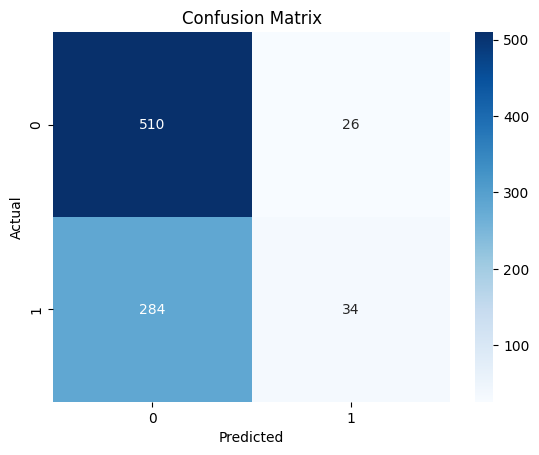

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


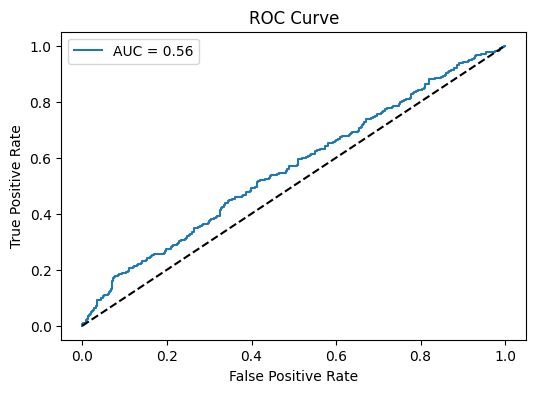

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", scores)
print("Mean Accuracy:", scores.mean())

Cross-validation accuracies: [0.6381733  0.62177986 0.76580796 0.62177986 0.62250879]
Mean Accuracy: 0.6540099552207252


## Decision Tree ##

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize and train model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree trained.")

Decision Tree trained.


In [57]:
print("Decision Tree Performance:\n")
print("✅ Accuracy :", accuracy_score(y_test, y_pred_dt))
print("✅ Precision:", precision_score(y_test, y_pred_dt, average="weighted"))
print("✅ Recall   :", recall_score(y_test, y_pred_dt, average="weighted"))
print("✅ F1 Score :", f1_score(y_test, y_pred_dt, average="weighted"))

print("\nDetailed Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Performance:

✅ Accuracy : 0.9742388758782201
✅ Precision: 0.9742828417054793
✅ Recall   : 0.9742388758782201
✅ F1 Score : 0.9742551779987787

Detailed Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.96      0.97      0.97       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



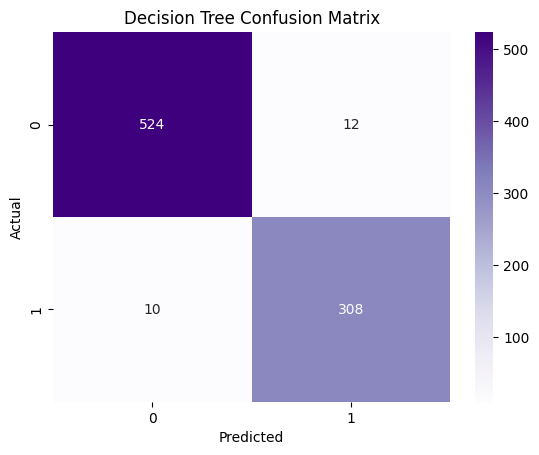

In [58]:
#Confusion Matrix for Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()

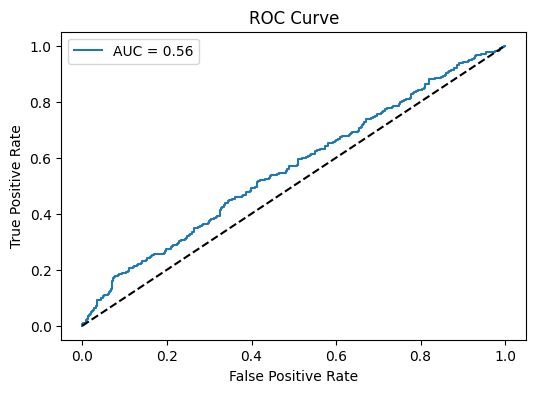

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Classifier trained")

Gradient Boosting Classifier trained


In [62]:
# Evaluation
print("Gradient Boosting Performance:\n")
print("✅ Accuracy :", accuracy_score(y_test, y_pred_gb))
print("✅ Precision:", precision_score(y_test, y_pred_gb, average="weighted"))
print("✅ Recall   :", recall_score(y_test, y_pred_gb, average="weighted"))
print("✅ F1 Score :", f1_score(y_test, y_pred_gb, average="weighted"))

print("\nDetailed Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Performance:

✅ Accuracy : 0.9754098360655737
✅ Precision: 0.9755768172517093
✅ Recall   : 0.9754098360655737
✅ F1 Score : 0.9753183234185551

Detailed Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       536
           1       0.98      0.95      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



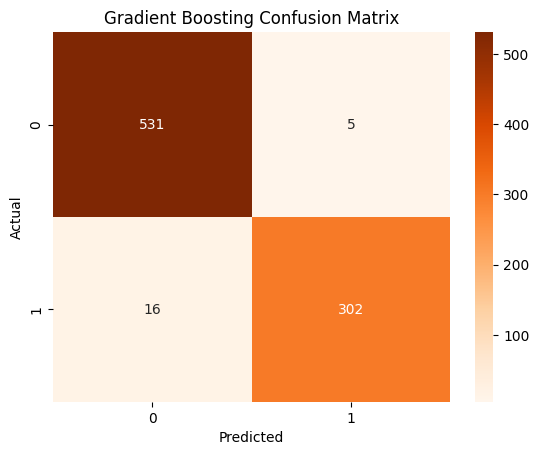

In [63]:
cm = confusion_matrix(y_test, y_pred_gb)

sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


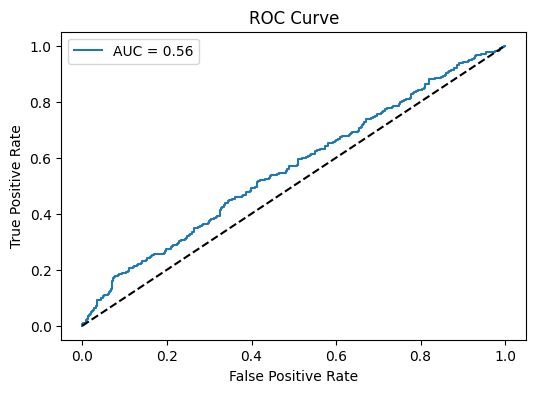

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Model is trained")

KNN Model is trained


In [66]:
# Metrics
print("✅ KNN Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


✅ KNN Results
Accuracy: 0.5772833723653396
Precision: 0.5523204862145844
Recall: 0.5772833723653396
F1 Score: 0.5585302759720211

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69       536
           1       0.41      0.29      0.34       318

    accuracy                           0.58       854
   macro avg       0.52      0.52      0.51       854
weighted avg       0.55      0.58      0.56       854



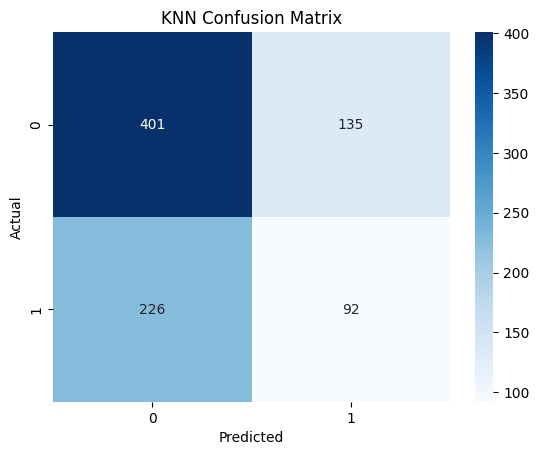

In [67]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## SVM

In [68]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Model is trained")

SVM Model is trained


In [69]:
# Metrics
print("✅ SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

✅ SVM Results
Accuracy: 0.6276346604215457
Precision: 0.393925266962469
Recall: 0.6276346604215457
F1 Score: 0.4840462992603575

Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       536
           1       0.00      0.00      0.00       318

    accuracy                           0.63       854
   macro avg       0.31      0.50      0.39       854
weighted avg       0.39      0.63      0.48       854



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:13

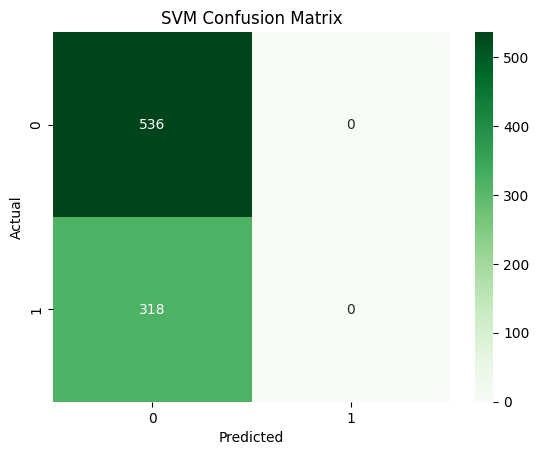

In [70]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
print(" Random Forest trained.")

 Random Forest trained.


## Evaluation Matrics

In [72]:
# Evaluation
print("Random Forest Performance:\n")
print("✅ Accuracy :", accuracy_score(y_test, y_pred_rf))
print("✅ Precision:", precision_score(y_test, y_pred_rf, average="weighted"))
print("✅ Recall   :", recall_score(y_test, y_pred_rf, average="weighted"))
print("✅ F1 Score :", f1_score(y_test, y_pred_rf, average="weighted"))

print("\nDetailed Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Performance:

✅ Accuracy : 0.9765807962529274
✅ Precision: 0.9765619791194287
✅ Recall   : 0.9765807962529274
✅ F1 Score : 0.9765656630358364

Detailed Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



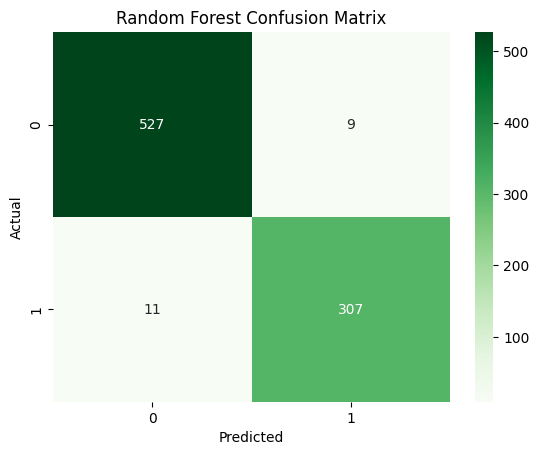

In [73]:
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

## ROC Curve

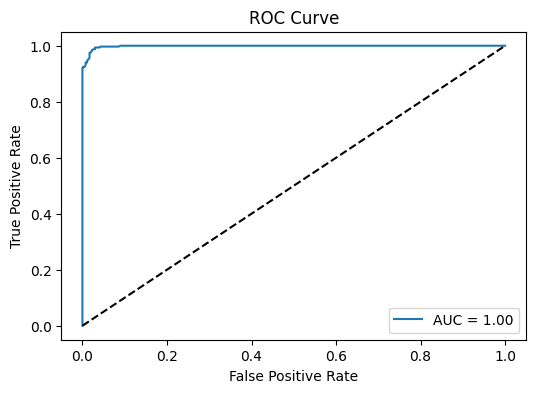

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Save Model

In [75]:
import joblib

# Suppose tumne RandomForest use kiya tha
joblib.dump(rf_model, "loan_model.pkl")
print("Random Forest model saved successfully")

Random Forest model saved successfully


# Results and Comparison

We summarize the performance of all models in a comparison table and visualize results for better interpretation.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.637002   0.614148  0.637002  0.548330
Decision Tree        0.974239   0.974283  0.974239  0.974255
Random Forest        0.976581   0.976562  0.976581  0.976566
Gradient Boosting    0.975410   0.975577  0.975410  0.975318
KNN                  0.577283   0.552320  0.577283  0.558530
SVM                  0.627635   0.393925  0.627635  0.484046


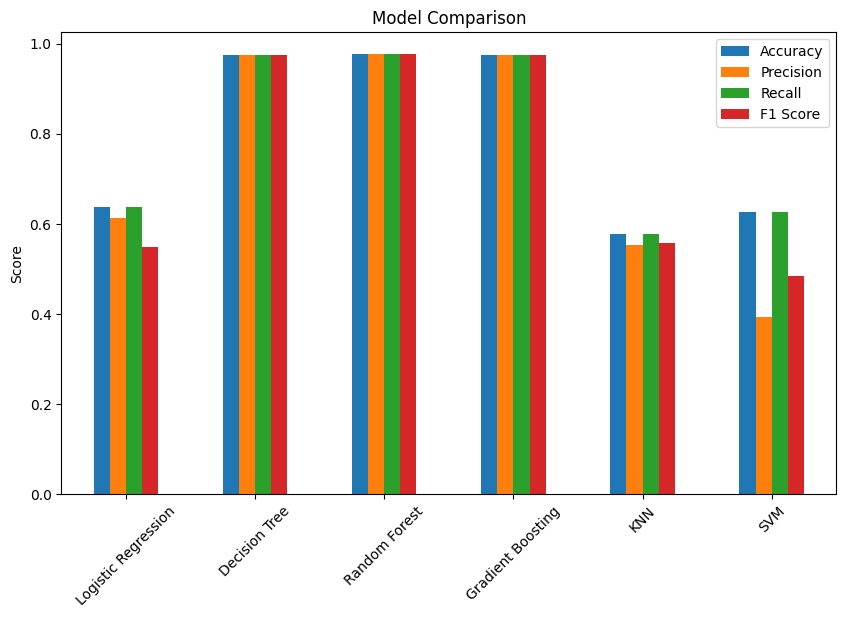

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store results
results = {}

# Helper function to evaluate models
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }

# Evaluate all trained models
evaluate_model("Logistic Regression", model, X_test, y_test)
evaluate_model("Decision Tree", dt_model, X_test, y_test)
evaluate_model("Random Forest", rf_model, X_test, y_test)
evaluate_model("Gradient Boosting", gb_model, X_test, y_test)
evaluate_model("KNN", knn, X_test, y_test)
evaluate_model("SVM", svm_model, X_test, y_test)

# Convert results into DataFrame
comparison_df = pd.DataFrame(results).T
print(comparison_df)

# Plot comparison
comparison_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


# Accuracy / F1-score Comparison Graph #

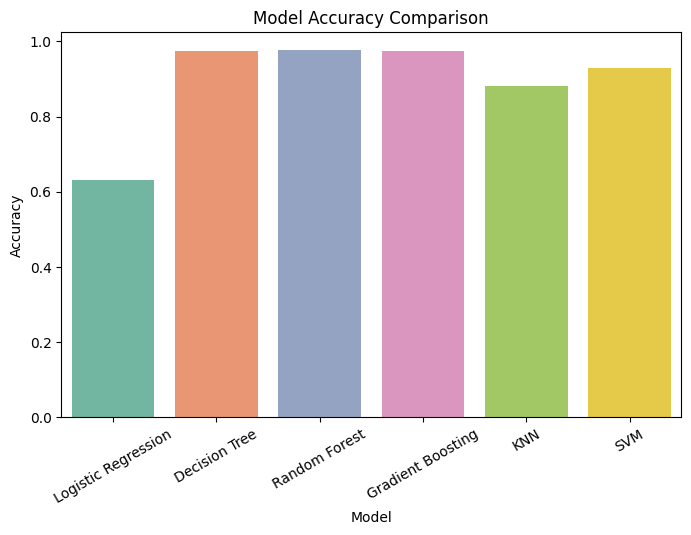

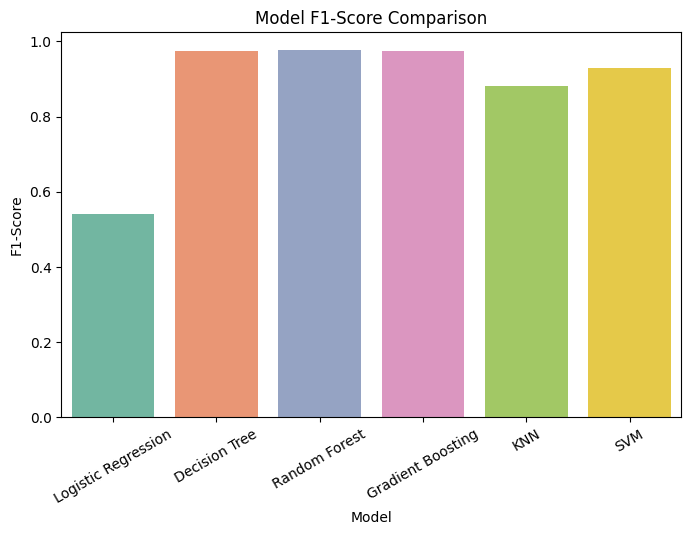

In [77]:
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "KNN", "SVM"],
    "Accuracy": [0.63, 0.974, 0.976, 0.975, 0.88, 0.93],  # apne results daalna
    "F1-Score": [0.54, 0.974, 0.976, 0.975, 0.88, 0.93]   # apne results daalna
}

results_df = pd.DataFrame(results)

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="Set2")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="F1-Score", data=results_df, palette="Set2")
plt.title("Model F1-Score Comparison")
plt.xticks(rotation=30)
plt.show()


# Conclusion  

- Ensemble models like **Random Forest (97.6%)** and **Gradient Boosting (97.5%)** performed the best.  
- Logistic Regression gave the lowest accuracy (63%), showing it cannot capture complex relationships well.  
- KNN and SVM also performed decently, with SVM achieving 93%.  

👉 Based on results, **Random Forest** is selected as the best model for deployment.  
